In [ ]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# json 파일 처리
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# Train 데이터에서 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [ ]:
# 모델
from tensorflow import keras

In [ ]:
# 랜덤숫자 생성
import random

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [ ]:
train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0617/Male/Train/"
test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0617/Male/Test/"


img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [ ]:
# label_name = ['Gofcore', 'Golf', 'Dandy', 'Romantic', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']
label_name = ['Gofcore', 'Golf', 'Dandy', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']

In [ ]:
season_name = ['Spring', 'Summer', 'Autumn', 'Winter']

# Train-Test 데이터 불러오기

In [ ]:
# print(len(os.listdir(train_dir_name + "Image")))
# 14770

In [ ]:
x_train_ori = []
y_train_ori = []

for i in range(0, 14771):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_train_ori.append(img_file_color)
    y_train_ori.append(label_file)


    if len(y_train_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_train_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
8500개 파일 읽기 완료
9000개 파일 읽기 완료
9500개 파일 읽기 완료
10000개 파일 읽기 완료
10500개 파일 읽기 완료
11000개 파일 읽기 완료
11500개 파일 읽기 완료
12000개 파일 읽기 완료
12500개 파일 읽기 완료
13000개 파일 읽기 완료
13500개 파일 읽기 완료
14000개 파일 읽기 완료
14500개 파일 읽기 완료
Complete


In [ ]:
# print(len(os.listdir(test_dir_name + "Image")))
# 3696

In [ ]:
x_test = []
y_test_ori = []

for i in range(0, 3697):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_test.append(img_file_color)
    y_test_ori.append(label_file)


    if len(y_test_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_test_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
Complete


# 이미지 확인

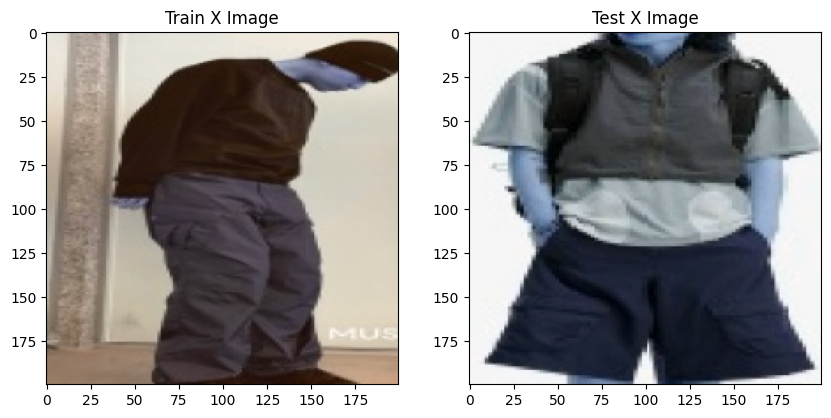

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_train_ori[0])
plt.title("Train X Image")

plt.subplot(1, 2, 2)
plt.imshow(x_test[0])
plt.title("Test X Image")

plt.show()

# 학습을 위해 X,Y데이터 형식 변경

In [ ]:
x_train_ori = np.array(x_train_ori)
x_train_ori.shape

(14770, 200, 200, 3)

In [ ]:
x_test = np.array(x_test)
x_test.shape

(3696, 200, 200, 3)

In [ ]:
y_train = []
season_train = []

for item in y_train_ori:
  label_num = label_name.index(item['Labeling'])

  y_train.append(label_num)
  season_train.append(item["Season"])

print(y_train[0])
print(season_train[0])

0
Autumn


In [ ]:
y_test = []
season_test = []

for item in y_test_ori:
  label_num = label_name.index(item['Labeling'])

  y_test.append(label_num)
  season_test.append(item["Season"])

print(y_test[0])
print(season_test[0])

0
Summer


In [ ]:
y_train = np.array(y_train)
y_train.shape

(14770,)

In [ ]:
y_train = y_train.astype('uint8')
y_train.dtype

dtype('uint8')

In [ ]:
y_test = np.array(y_test)
y_test.shape

(3696,)

In [ ]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# 계절 정보 통계

## Train 계절 통계

In [ ]:
season_count = []

season_count.append(season_train.count('Spring'))
season_count.append(season_train.count('Summer'))
season_count.append(season_train.count('Autumn'))
season_count.append(season_train.count('Winter'))
season_count.append(season_train.count('None'))

print(season_count)

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

## Test 계절 통계

In [ ]:
season_count = []

season_count.append(season_test.count('Spring'))
season_count.append(season_test.count('Summer'))
season_count.append(season_test.count('Autumn'))
season_count.append(season_test.count('Winter'))
season_count.append(season_test.count('None'))

print(season_count)

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

# Train 데이터에서 Validation 데이터 분리

In [ ]:
y_train_all = y_train[:]

x_train = []
y_train = []
x_val = []
y_val = []

x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_all, test_size=0.25, stratify=y_train_all)

In [ ]:
x_train.shape

(11077, 200, 200, 3)

In [ ]:
y_train.shape

(11077,)

In [ ]:
x_val.shape

(3693, 200, 200, 3)

In [ ]:
y_val.shape

(3693,)

# 학습 데이터 통계

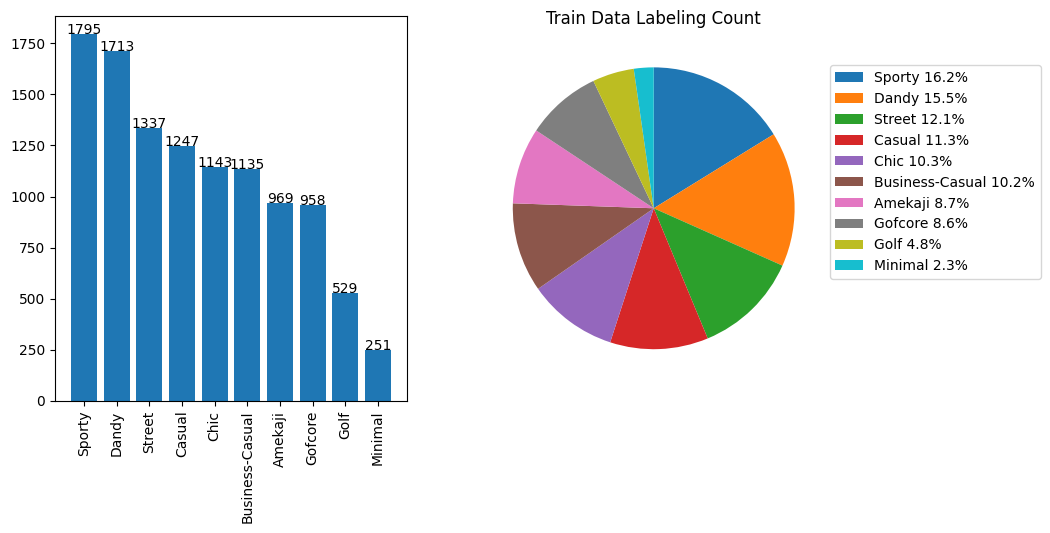

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_train:
    label = label_name[item]
    if label not in label_count: # 해당 키가 없을 경우
        label_count[label] = 1
    else:
        label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Train Data Labeling Count")
plt.show()

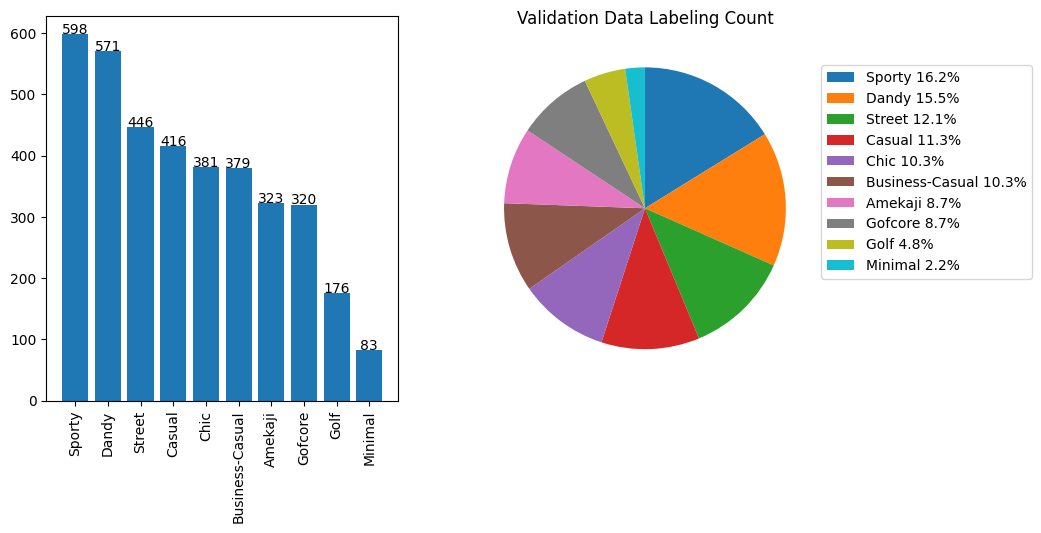

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_val:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Validation Data Labeling Count")
plt.show()

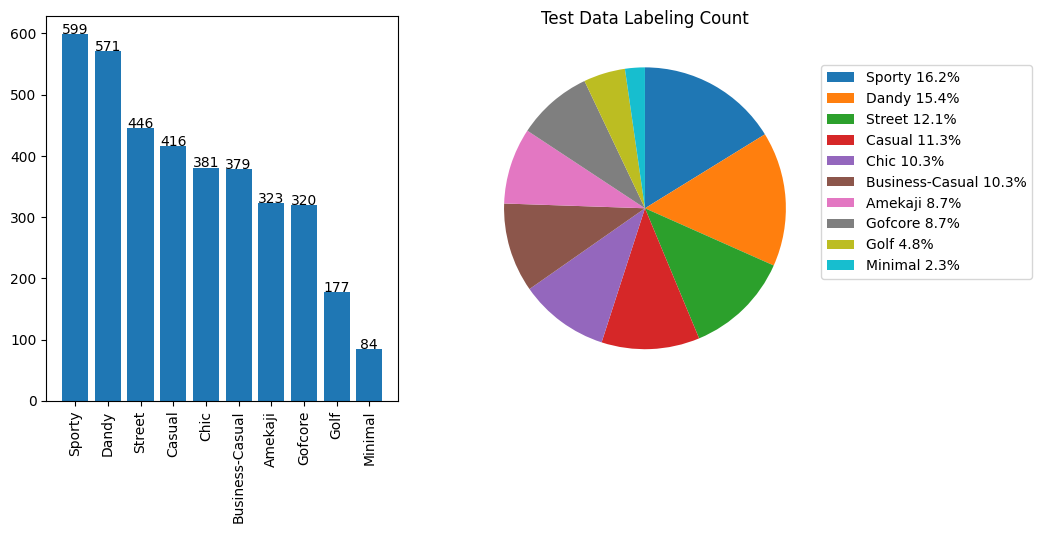

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# Train 데이터 어그멘테이션

In [ ]:
# 혹시 모르니 백업해두기
ori_x_train = x_train[:]
ori_y_train = y_train[:]

print(ori_x_train.shape)
print(ori_y_train.shape)

(11077, 200, 200, 3)
(11077,)


In [ ]:
print("Before length")
print(x_train.shape)
print(y_train.shape)
print()

# 변형을 위해 리스트로 변환
x_train = list(x_train)
y_train = list(y_train)

ori_len = len(x_train) # 계속 길이가 추가될 테니까 미리 계산
for i in range(0, ori_len):
  # 진행도 체크
  if (i+1)%1000 == 0:
    print(str(i+1) + "개 Train 데이터 적용 완료")

  # 90도 회전
  # rotate_90 = cv2.rotate(x_train[i], cv2.ROTATE_90_CLOCKWISE)
  # x_train.append(rotate_90)
  # y_train.append(y_train[i])

  # 180도 회전
  rotate_180 = cv2.rotate(x_train[i], cv2.ROTATE_180)
  x_train.append(rotate_180)
  y_train.append(y_train[i])

  # 270도 회전
  # rotate_270 = cv2.rotate(x_train[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
  # x_train.append(rotate_270)
  # y_train.append(y_train[i])


# 학습을 위해 다시 ndarray 형태로 변환
x_train = np.array(x_train)
y_train = np.array(y_train)

print()
print("Complete")
print("After length")
print(x_train.shape)
print(y_train.shape)

Before length
(11077, 200, 200, 3)
(11077,)

1000개 Train 데이터 적용 완료
2000개 Train 데이터 적용 완료
3000개 Train 데이터 적용 완료
4000개 Train 데이터 적용 완료
5000개 Train 데이터 적용 완료
6000개 Train 데이터 적용 완료
7000개 Train 데이터 적용 완료
8000개 Train 데이터 적용 완료
9000개 Train 데이터 적용 완료
10000개 Train 데이터 적용 완료
11000개 Train 데이터 적용 완료

Complete
After length
(22154, 200, 200, 3)
(22154,)


## 어그멘테이션 확인

In [ ]:
rand_num = random.randint(0, ori_len)
print("Random Number : ", rand_num)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(x_train[rand_num])
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(x_train[ori_len + (rand_num*3)])
plt.title("Rotate 90")

plt.subplot(1, 4, 3)
plt.imshow(x_train[ori_len + (rand_num*3) + 1])
plt.title("Rotate 180")

plt.subplot(1, 4, 4)
plt.imshow(x_train[ori_len + (rand_num*3) + 2])
plt.title("Rotate 270")

plt.show()

# 모델 생성

## 케라스 기본 모델들

In [ ]:
fashion_model = keras.applications.VGG16(include_top=True,
                                         weights=None,
                                         input_tensor=None,
                                         input_shape=(img_height, img_width, 3),
                                         pooling='max',
                                         classes=10,
                                         classifier_activation='softmax')

In [ ]:
fashion_model = keras.applications.VGG19(include_top=True,
                                         weights=None,
                                         input_tensor=None,
                                         input_shape=(img_height, img_width, 3),
                                         pooling='max',
                                         classes=10,
                                         classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet50(include_top=True,
                                            weights=None,
                                            input_tensor=None,
                                            input_shape=(img_height, img_width, 3),
                                            pooling='max',
                                            classes=10)

In [ ]:
fashion_model = keras.applications.ResNet101(include_top=True,
                                             weights=None,
                                             input_tensor=None,
                                             input_shape=(img_height, img_width, 3),
                                             pooling='max',
                                             classes=10,
                                             classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet152(include_top=True,
                                             weights=None,
                                             input_tensor=None,
                                             input_shape=(img_height, img_width, 3),
                                             pooling='max',
                                             classes=10,
                                             classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet50V2(include_top=True,
                                              weights=None,
                                              input_tensor=None,
                                              input_shape=(img_height, img_width, 3),
                                              pooling='max',
                                              classes=10,
                                              classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet101V2(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet152V2(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNet(input_shape=(img_height, img_width, 3),
                          alpha=1.0,
                          depth_multiplier=1,
                          dropout=0.001,
                          include_top=True,
                          weights=None,
                          input_tensor=None,
                          pooling='max',
                          classes=10,
                          classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               alpha=1.0,
                                               include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNetV3Small(input_shape=(img_height, img_width, 3),
                                                    alpha=1.0,
                                                    minimalistic=False,
                                                    include_top=True,
                                                    weights=None,
                                                    input_tensor=None,
                                                    classes=10,
                                                    pooling='max',
                                                    dropout_rate=0.2,
                                                    classifier_activation="softmax",
                                                    include_preprocessing=False)

In [ ]:
fashion_model = keras.applications.MobileNetV3Large(input_shape=(img_height, img_width, 3),
                                                    alpha=1.0,
                                                    minimalistic=False,
                                                    include_top=True,
                                                    weights=None,
                                                    input_tensor=None,
                                                    classes=10,
                                                    pooling='max',
                                                    dropout_rate=0.2,
                                                    classifier_activation="softmax",
                                                    include_preprocessing=False)

In [ ]:
fashion_model = keras.applications.DenseNet121(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.DenseNet169(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.DenseNet201(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.NASNetLarge(input_shape=(img_height, img_width, 3),
                                               include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.NASNetMobile(input_shape=(img_height, img_width, 3),
                                                include_top=True,
                                                weights=None,
                                                input_tensor=None,
                                                pooling='max',
                                                classes=10,
                                                classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.InceptionV3(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.InceptionResNetV2(include_top=True,
                                                     weights=None,
                                                     input_tensor=None,
                                                     input_shape=(img_height, img_width, 3),
                                                     pooling='max',
                                                     classes=10,
                                                     classifier_activation="softmax")

## VGGNet

In [ ]:
def Vgg():
  input_img = keras.layers.Input(shape=(img_height, img_width, 3))

  conv1 = keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_img)
  conv1 = keras.layers.Dropout(0.2)(conv1)
  conv1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
  pool1 = keras.layers.MaxPooling2D(2)(conv1)

  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
  conv2 = keras.layers.Dropout(0.2)(conv2)
  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2)
  pool2 = keras.layers.MaxPooling2D(2)(conv2)

  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
  conv3 = keras.layers.Dropout(0.2)(conv3)
  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3)
  pool3 = keras.layers.MaxPooling2D(2)(conv3)

  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool3)
  conv4 = keras.layers.Dropout(0.2)(conv4)
  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
  pool4 = keras.layers.MaxPooling2D(2)(conv4)

  conv5 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool4)
  conv5 = keras.layers.Dropout(0.2)(conv5)
  conv5 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv5)
  pool5 = keras.layers.MaxPooling2D(2)(conv5)

  flat = keras.layers.Flatten()(pool5)

  dense1 = keras.layers.Dense(1000, activation='relu')(flat)
  dense1 = keras.layers.Dropout(0.2)(dense1)

  dense2 = keras.layers.Dense(1000, activation='relu')(dense1)
  dense2 = keras.layers.Dropout(0.2)(dense2)

  dense3 = keras.layers.Dense(1000, activation='relu')(dense2)
  dense3 = keras.layers.Dropout(0.2)(dense3)


  # 모델이 총 10개의 패션 타입을 분류하므로 마지막 층은 11개의 뉴런 설정
  output_label = keras.layers.Dense(10, activation='softmax', name='OutputLayer')(dense3)

  model = keras.Model(input_img, output_label)
  return model

## GoogLeNet

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
  # Input:
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = keras.layers.Conv2D(filters = f1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = keras.layers.Conv2D(filters = f2_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path2 = keras.layers.Conv2D(filters = f2_conv3, kernel_size = 3, padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = keras.layers.Conv2D(filters = f3_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path3 = keras.layers.Conv2D(filters = f3_conv5, kernel_size = 5, padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = keras.layers.MaxPooling2D(3, strides = 1, padding = 'same')(input_layer)
  path4 = keras.layers.Conv2D(filters = f4, kernel_size = 1, padding = 'same', activation = 'relu')(path4)

  output_layer = keras.layers.concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer
  input_layer = keras.layers.Input(shape = (img_height, img_width, 3))

  # Inception layers
  X = keras.layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, padding = 'valid', activation = 'relu')(input_layer)
  # X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2)(X)
  X = keras.layers.Conv2D(filters = 64, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(X)
  X = keras.layers.Conv2D(filters = 192, kernel_size = 3, padding = 'same', activation = 'relu')(X)
  X = keras.layers.MaxPooling2D(pool_size= 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)
  X = keras.layers.MaxPooling2D(pool_size= 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # 임의로 추가
  X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2, name="Addition")(X)
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer
  X = keras.layers.GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer
  X = keras.layers.Dropout(0.4)(X)

  # Dense layer. 쓸모 있을지는 모르겠다
  X = keras.layers.Dense(1000, activation='relu')(X)
  X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Dense(1000, activation='relu')(X)

  # output layer
  # 모델이 총 10개의 패션 타입을 분류하므로 마지막 층은 10개의 뉴런 설정
  output_layer = keras.layers.Dense(10, activation='softmax', name='OutputLayer')(X)

  # model 정의
  model = keras.Model(input_layer, output_layer, name = 'GoogLeNet')

  return model

## 모델 설정

In [ ]:
# fashion_model = Vgg()
# fashion_model = GoogLeNet()

In [ ]:
# adam learning_rate 기본값 0.001
adam = keras.optimizers.Adam(learning_rate=0.00002)
fashion_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
fashion_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 99, 99, 32)           864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 99, 99, 32)           128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 99, 99, 32)           0         ['stem_bn1[0][0]']       

In [ ]:
# 모델 구조 시각화
keras.utils.plot_model(fashion_model, show_shapes=True)

## 중간까지 학습한 모델을 다시 불러올 경우

In [ ]:
saved_model_path = model_dir_name + 'fashion_classification_male_0815_03.keras'

fashion_model = keras.models.load_model(saved_model_path)

In [ ]:
fashion_model.summary()

## 모델이 덮어쓰기되지 않도록 이름 잊지말고 바꿔주기

In [ ]:
fashion_model_path = model_dir_name + 'fashion_classification_male_0817_09.keras'

# 모델 학습

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(fashion_model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = fashion_model.fit(x_train, y_train,
                            epochs=50, verbose=1,
                            validation_data=(x_val, y_val),
                            callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
693/693 [==============================] - 284s 239ms/step - loss: 2.0789 - sparse_categorical_accuracy: 0.2465 - val_loss: 3.7337 - val_sparse_categorical_accuracy: 0.0880
Epoch 2/50
693/693 [==============================] - 160s 231ms/step - loss: 1.9593 - sparse_categorical_accuracy: 0.2864 - val_loss: 2.4967 - val_sparse_categorical_accuracy: 0.1034
Epoch 3/50
693/693 [==============================] - 159s 230ms/step - loss: 1.9054 - sparse_categorical_accuracy: 0.3095 - val_loss: 2.2745 - val_sparse_categorical_accuracy: 0.1571
Epoch 4/50
693/693 [==============================] - 160s 230ms/step - loss: 1.8543 - sparse_categorical_accuracy: 0.3339 - val_loss: 2.2695 - val_sparse_categorical_accuracy: 0.1516
Epoch 5/50
693/693 [==============================] - 156s 226ms/step - loss: 1.8047 - sparse_categorical_accuracy: 0.3528 - val_loss: 2.2727 - val_sparse_categorical_accuracy: 0.1305
Epoch 6/50
693/693 [==============================] - 156s 225ms/step - loss: 1.

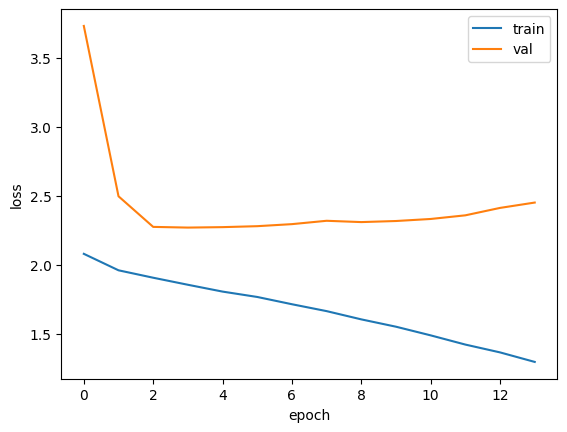

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

In [ ]:
saved_model_path = model_dir_name + 'fashion_classification_male_0817_09.keras'

saved_model = keras.models.load_model(saved_model_path)

In [ ]:
saved_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 99, 99, 32)           864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 99, 99, 32)           128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 99, 99, 32)           0         ['stem_bn1[0][0]']       

## 1개 Test 데이터 예측결과 확인

In [ ]:
y_test.shape

(3696,)

In [ ]:
num = random.randint(0, 3695)
print("Random Number : ", num)

preds = saved_model.predict(x_test[num:num+1])
type(preds)

Random Number :  1905
1/1 [==============================] - 5s 5s/step


numpy.ndarray

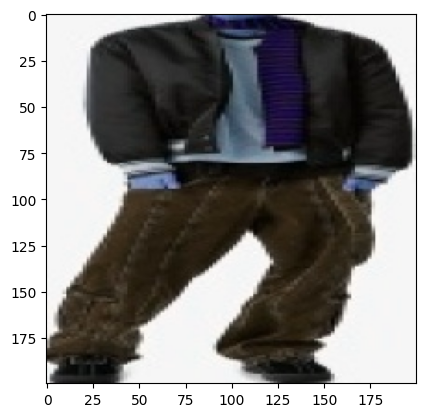

True Label :  Street
Pred Label :  Street


In [ ]:
true_label = label_name[y_test[num]]
pred_label = label_name[np.argmax(preds)]

plt.imshow(x_test[num])
plt.show()

print('True Label : ', true_label)
print('Pred Label : ', pred_label)

## 전체 Test 데이터 정확도 확인

In [ ]:
 saved_model.evaluate(x_test, y_test)

116/116 [==============================] - 10s 55ms/step - loss: 2.2714 - sparse_categorical_accuracy: 0.1518


[2.271354913711548, 0.1517857164144516]